
area to search: [(2.8284271247461903, -2.0000000000000004, -2.0), (2.8284271247461903, -2.0000000000000004, 2.0), (2.8284271247461903, 2.0000000000000004, -2.0), (2.8284271247461903, 2.0000000000000004, 2.0)]

planes:
[-8.000000000000002, -11.313708498984761, 0.0]
[8.000000000000002, -11.313708498984761, 0.0]
[8.000000000000002, 0.0, 11.313708498984763]
[-8.000000000000002, 0.0, 11.313708498984763]
[-16.000000000000004, -0.0, -0.0]

Point : (2, 2, 2)
6.627416997969522
Point : (3, 3, 3)
9.941125496954278
Point : (4, 4, 4)
13.254833995939045
Point : (5, 5, 5)
16.56854249492381
Point : (6, 6, 6)
19.882250993908556
Point : (7, 7, 7)
23.195959492893323
Point : (8, 8, 8)
26.50966799187809
Point : (9, 9, 9)
29.823376490862856
Point : (0.5, 0.1, 0.1)
-2.8686291501015244
5.131370849898477
-5.131370849898477
2.8686291501015244
-8.000000000000002
the point detected in search area is  (0.5, 0.1, 0.1)


True

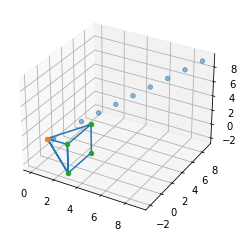

In [126]:
import math
import matplotlib.pyplot as plt
import numpy as np

# angleY is left/right angle, z is up/down angle (in degrees)
def get_search_area(distance, angleY, angleZ, position):
    '''returns a list of the four corner coordinates of the projected rectangle 
    based on the current position, horizontal and vertical fields of view, and 
    set distance away'''
    
    # orients from North to East for the polar plane, and converts inputed angle
    # from degrees into radians
    angleY, angleZ = angleY/2, angleZ/2
    angleY, angleZ = 90-angleY, 90-angleZ
    angleY, angleZ = angleY*(math.pi)/180, angleZ*(math.pi)/180
    
    # converts from polar into cartesian
    left  = distance * math.cos(angleY) * -1
    right = distance * math.cos(angleY)
    up    = distance * math.sin(-1*angleZ)
    down  = distance * math.sin(angleZ)
    
    # creates list of the corner points, and orients rectangle to current position
    area = [(distance, left, up), (distance, left, down), (distance, right, up), (distance, right, down)] 
    area = [(position[0]+point[0], position[1]+point[1], position[2]+point[2] ) for point in area]
    
    # plots points of the projected rectangle for visualization
    for point in area:
        ax.scatter(point[0], point[1], point[2], color='#2ca02c')
    
    return area


def get_plane(a, b, c):
    '''given three coordinates, returns [p, q, r] of px+qy+rz=d plane equation.'''
    ab = (a[0]-b[0], a[1]-b[1], a[2]-b[2])
    ac = (a[0]-c[0], a[1]-c[1], a[2]-c[2])
    cross = list(np.cross(ab, ac))
    return cross


def run_equation(point, plane):
    '''returns the dot product of the normal vector to the plane and a separate point'''
    result = point[0]*plane[0] + point[1]*plane[1] + point[2]*plane[2]
    print(result)
    return result


def search_area(position, area, space):
    '''given an area to search of the enclosed 3D-shape of the area and points, checks
    each point in the global space area is inside of the space'''
    
    # breaks area space into coordinates - upper left, bottom left, upper right, bottom right
    ul, bl, ur, br = area[0], area[1], area[2], area[3]
    
    # finds the equation of the plane for each side of the enclosed shape
    left = get_plane(position, ul, bl)
    right = get_plane(position, ur, br)
    top = get_plane(position, ul, ur)
    bottom = get_plane(position, bl, br)
    back = get_plane(ul, bl, ur)
    
    # prints the p,q,r data of each plane equation
    print('planes:')
    print(left)
    print(right)
    print(top)
    print(bottom)
    print(back)
    print()
    
    # checks the points in the space-system to see if inside the enclosed shape
    for point in space:
        print('Point :', point)
        if (run_equation(point, bottom) > 0):
            continue
        if (run_equation(point, top) < 0):
            continue
        if (run_equation(point, left) > 0):
            continue
        if (run_equation(point, right) < 0):
            continue
        if (run_equation(point, back) > 0):
            continue
        print('the point detected in search area is ', point)
        return True
    
    return False


# fake creation of space and objects
space = [(x, x, x) for x in range(2, 10) ]
# this point is too close to drone, and should be detected later
space.append((0.5, 0.1, 0.1))
x = [a for (a, b, c) in space]
y = [b for (a, b, c) in space]
z = [c for (a, b, c) in space]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x, y, z, alpha=0.5)

# current position of the drone - can be anywhere on grid
current = (0, 0, 0)
ax.scatter(current[0], current[1], current[2])

# square_root(2) for distance, 90 degree horizontal and vertical view)
area = get_search_area(math.sqrt(8), 90, 90, current)

print()
print('area to search:', area)
print()

draw_rectangle = [area[0], area[1], area[3], area[2], area[0], current, area[1], area[0], current, area[3]]
x_rect = [x for (x, y, z) in draw_rectangle]
y_rect = [y for (x, y, z) in draw_rectangle]
z_rect = [z for (x, y, z) in draw_rectangle]

plt.plot(x_rect, y_rect, z_rect)

search_area(current, area, space)